# Business Usecase: Predict the loan amount

### Exploratary Data Analysis

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

import sklearn 

Get rid of the null values

In [2]:
df = pd.read_csv('Columbia_CLI.csv')

In [3]:
def drop_columns(data):
    data2 = data
    for col in data.columns:
        if data[col].isnull().sum() >= 500:
            data2 = data2.drop(col,axis=1)
    return data2


In [4]:
df = drop_columns(df)

In [5]:
df.head()

,id,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,0.00,15-Jan,171.62,16-Jan,0,1,INDIVIDUAL,0
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0,1,INDIVIDUAL,0
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,0.00,14-Jun,649.91,16-Jan,0,1,INDIVIDUAL,0
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,15-Jan,357.48,15-Jan,0,1,INDIVIDUAL,0
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,16-Jan,67.79,16-Jan,0,1,INDIVIDUAL,0


In [6]:
df.isnull().sum()

id                              0
member_id                       0
CLI                             0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                      51
emp_length                     17
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
pymnt_plan                      0
desc                          432
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_s

In [7]:
df['emp_length'].mode()

0    10+ years
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          999 non-null    int64  
 1   member_id                   999 non-null    int64  
 2   CLI                         999 non-null    int64  
 3   term                        999 non-null    object 
 4   int_rate                    999 non-null    float64
 5   installment                 999 non-null    float64
 6   grade                       999 non-null    object 
 7   sub_grade                   999 non-null    object 
 8   emp_title                   948 non-null    object 
 9   emp_length                  982 non-null    object 
 10  home_ownership              999 non-null    object 
 11  annual_inc                  999 non-null    float64
 12  verification_status         999 non-null    object 
 13  loan_status                 999 non

In [9]:
#sns.heatmap(df.corr())
df.corr().head()

,id,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq
id,1.000000,0.830797,0.030180,0.082866,0.044599,0.003609,-0.007914,0.003688,0.026016,-0.014925,...,0.016362,0.016454,0.012629,0.009793,-0.014061,-0.022065,0.019447,NaN,NaN,NaN
member_id,0.830797,1.000000,0.028398,0.084302,0.042440,-0.007242,-0.034455,-0.001928,-0.011848,-0.049054,...,0.013837,0.009533,0.018857,0.010487,-0.002774,-0.012378,-0.007624,NaN,NaN,NaN
CLI,0.030180,0.028398,1.000000,0.239369,0.953777,0.399354,0.067937,-0.040099,0.001926,0.133464,...,0.885008,0.831625,0.690638,0.123866,0.100024,0.053854,0.393859,NaN,NaN,NaN
int_rate,0.082866,0.084302,0.239369,1.000000,0.176843,0.085052,0.113889,0.135494,0.251060,0.111587,...,0.229659,0.065930,0.543451,0.061886,0.115847,0.092008,0.138034,NaN,NaN,NaN
installment,0.044599,0.042440,0.953777,0.176843,1.000000,0.391628,0.054418,-0.039032,-0.002207,0.120404,...,0.852536,0.838105,0.564917,0.110985,0.065846,0.022312,0.352021,NaN,NaN,NaN


#### Correlation each label has with CLI

In [10]:
df1 = df.corr()['CLI']
df1 = df1.apply(abs)
df1.sort_values(ascending=False)

CLI                           1.000000
installment                   0.953777
total_pymnt                   0.887862
total_pymnt_inv               0.885008
total_rec_prncp               0.831625
total_rec_int                 0.690638
annual_inc                    0.399354
last_pymnt_amnt               0.393859
revol_bal                     0.364922
out_prncp_inv                 0.275282
out_prncp                     0.275183
int_rate                      0.239369
total_acc                     0.234801
open_acc                      0.133464
total_rec_late_fee            0.123866
pub_rec                       0.108388
recoveries                    0.100024
dti                           0.067937
revol_util                    0.062898
collection_recovery_fee       0.053854
delinq_2yrs                   0.040099
id                            0.030180
member_id                     0.028398
inq_last_6mths                0.001926
collections_12_mths_ex_med         NaN
policy_code              

#### Dropping irrelevant columns

In [11]:
df.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','inq_last_6mths','member_id','delinq_2yrs','collection_recovery_fee','revol_util', 'dti'], axis=1)

,id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,15-Jan,171.62,16-Jan,INDIVIDUAL
1,1077430,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,13-Apr,119.66,13-Sep,INDIVIDUAL
2,1077175,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,14-Jun,649.91,16-Jan,INDIVIDUAL
3,1076863,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,15-Jan,357.48,15-Jan,INDIVIDUAL
4,1075358,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,16-Jan,67.79,16-Jan,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,7000,36 months,8.90,222.28,A,A5,Harvard University,5 years,OWN,...,8000.341221,8000.34,7000.00,1000.34,0.00,0.00,14-Dec,229.64,14-Dec,INDIVIDUAL
995,1057629,2425,36 months,15.27,84.39,C,C4,Lime Energy,3 years,OWN,...,3052.790000,3052.79,2424.99,612.80,15.00,0.00,15-Jan,16.06,15-Jul,INDIVIDUAL
996,1057621,6950,36 months,9.91,223.97,B,B1,Real Mex Foods,2 years,RENT,...,7349.480000,7349.48,6950.01,399.47,0.00,0.00,12-Sep,1560.92,14-Apr,INDIVIDUAL
997,1057787,12375,36 months,9.91,398.79,B,B1,JP Morgan Chase,10+ years,OWN,...,13433.960000,13399.63,12375.01,1058.95,0.00,0.00,12-Dec,9056.48,16-Jan,INDIVIDUAL


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          999 non-null    int64  
 1   member_id                   999 non-null    int64  
 2   CLI                         999 non-null    int64  
 3   term                        999 non-null    object 
 4   int_rate                    999 non-null    float64
 5   installment                 999 non-null    float64
 6   grade                       999 non-null    object 
 7   sub_grade                   999 non-null    object 
 8   emp_title                   948 non-null    object 
 9   emp_length                  982 non-null    object 
 10  home_ownership              999 non-null    object 
 11  annual_inc                  999 non-null    float64
 12  verification_status         999 non-null    object 
 13  loan_status                 999 non

In [13]:
df.dtypes

id                              int64
member_id                       int64
CLI                             int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

# Feature Engineering
#### Preparing the proper input dataset, compatible with the machine learning algorithm requirements.## 

We made a dictionary for each object and replaced the existing values with integers.

In [14]:
df = df.replace({"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10}, value=None, inplace=False, limit=None, regex=False, method='pad')

In [15]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df['term'].isnull().sum()

0

In [17]:
df = df.replace({" 36 months": 0, " 60 months": 1}, value=None, inplace=False, limit=None, regex=False, method='pad')

In [18]:
#grade
df = df.replace({"A":6, "B":5, "C":4, "D":3, "E":2, "F":1, "G": 0}, value=None, inplace=False, limit=None, regex=False, method='pad')


In [19]:
df['emp_title']

0                                   NaN
1                                 Ryder
2                                   NaN
3                   AIR RESOURCES BOARD
4              University Medical Group
                     ...               
994                  Harvard University
995                         Lime Energy
996                      Real Mex Foods
997                     JP Morgan Chase
998    Regional Transportation District
Name: emp_title, Length: 999, dtype: object

In [20]:
df = df.drop('emp_title', axis=1)

In [21]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [22]:
df = df.replace({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2}, value=None, inplace=False, limit=None, regex=False, method='pad')

In [23]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [24]:
df = df.replace({'Verified': 0, 'Source Verified': 1, 'Not Verified': 2}, value=None, inplace=False, limit=None, regex=False, method='pad')

In [25]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)'], dtype=object)

In [26]:
df = df.replace({'Fully Paid': 0, 'Current': 1, 'Late (31-120 days)': 2, 'Default': 3, 'Charged Off':4}, value=None, inplace=False, limit=None, regex=False, method='pad')

In [27]:
df['pymnt_plan']

0      n
1      n
2      n
3      n
4      n
      ..
994    n
995    n
996    n
997    n
998    n
Name: pymnt_plan, Length: 999, dtype: object

Dropped "pymnt_plan" because its outputs are not helpful

In [28]:
df = df.drop(['pymnt_plan','desc'],axis=1)

In [29]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5'], dtype=object)

In [30]:
#subgrade
df = df.replace({"A1":34, "A2":33, "A3":32, "A4":31, "A5":30, "B1":29, "B2":28, "B3":27, "B4":26, "B5":25, "C1":24, "C2":23, "C3":22, "C4":21, "C5":20, "D1":19, "D2":18, "D3":17, "D4":16, "D5":15, "E1":14, "E2":13, "E3":12, "E4":11, "E5":10, "F1":9, "F2":8, "F3":7, "F4":6, "F5":5, "G1":4, "G2":3, "G3":2, "G4":1}, value=None, inplace=False, limit=None, regex=False, method='pad')


In [31]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy'],
      dtype=object)

In [32]:
#purpose
df = df.replace({"credit_card":0,"car":1,"small_business":2,"wedding":3,"debt_consolidation":4,"home_improvement":5,
                 "major_purchase":6,"medical":7,"moving":8,"vacation":9,"house":10,"renewable_energy":11,"other":12},
                 value=None, inplace=False, limit=None, regex=False, method='pad')


## Bar Graph - Correlation between "purpose" and CLI

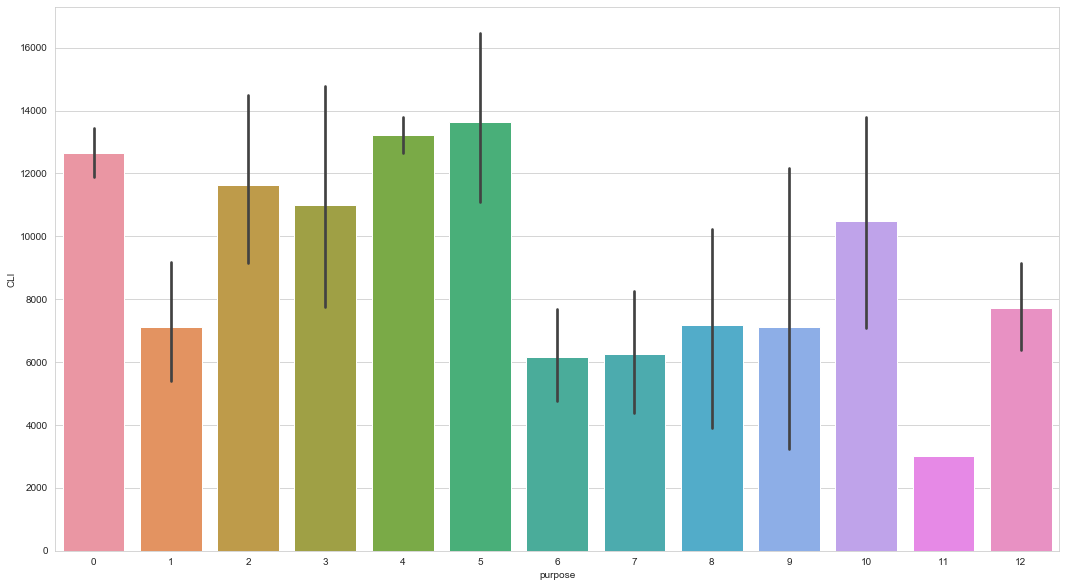

In [33]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=df['purpose'], y=df['CLI'])

In [34]:
df['title'].unique()

array(['Computer', 'bike', 'real estate business', 'personel', 'Personal',
       'My wedding loan I promise to pay back', 'Loan', 'Car Downpayment',
       'Expand Business & Buy Debt Portfolio',
       'Building my credit history.', 'High intrest Consolidation',
       'Consolidation', 'freedom', 'citicard fund', 'Other Loan',
       'Debt Consolidation Loan', 'Home', 'Holiday', 'Medical',
       'lowerratemeanseasiertogetoutofdebt!', 'Freedom From Credit Cards',
       'Debt Cleanup', 'Credit Card Loan', 'Debt Consolidation', 'cash',
       'No more credit card debt!', 'consolidation', 'Other',
       'Credit card repayment loan', 'Brown Eyes Loan',
       'December 2011 Credit Card Loan',
       'Moving to better job; help a veteran!',
       'Credit Card Consolidation', 'Credit card debt',
       'Year End Cleanup', 'debt', 'Debt-Consolidation ',
       'Small Business Loan', 'Debt Consolidation for a better life',
       'Debt Consolitation ', 'Credit card refinance loan',
      

In [35]:
df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', '1-Nov', 'Feb-96', 'Jan-96', '4-Nov', '5-Jul',
       '7-Jan', '4-Apr', '4-Sep', 'Jan-98', 'Oct-89', '3-Jul', 'May-91',
       '7-Sep', 'Oct-98', 'Aug-93', '3-Oct', '1-Jan', 'Nov-97', 'Feb-83',
       'Jul-85', '3-Apr', '1-Jun', '2-Feb', 'Aug-84', '6-Nov', 'Dec-87',
       'Nov-81', 'Feb-97', '5-Apr', '7-Oct', 'Dec-00', '7-Apr', '1-Dec',
       '3-Jan', 'Mar-94', 'Sep-98', '4-Jun', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', '2-Jan', 'Apr-92', '6-Oct', 'May-00', 'Dec-98', '4-Dec',
       'Oct-00', '2-May', '6-May', '2-Jul', '6-Jul', 'May-97', '5-Oct',
       'Apr-95', '2-Oct', 'Jan-00', 'Apr-00', 'Dec-94', '5-Sep', 'Dec-84',
       'Dec-99', '3-Nov', 'Jun-89', '3-Jun', 'Oct-96', '3-May', '2-Jun',
       '7-Jun', 'Dec-96', 'Feb-84', '2-Sep', 'Jan-86', 'May-98', 'Jan-97',
       '5-Jun', 'Feb-90', '4-Mar', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       '6-Apr', 'Apr-90', 'Aug-99', 'Sep-00', '1-Feb', 'Dec-88', 'Feb-99',
       'Dec-91', 'Aug-00', '4-Oct', '4-

In [36]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

In [37]:
df['last_pymnt_d'].unique()

array(['15-Jan', '13-Apr', '14-Jun', '16-Jan', '12-Apr', '12-Nov',
       '13-Jun', '13-Sep', '12-Jul', '13-Oct', '13-May', '15-Feb',
       '15-Aug', '12-Oct', '12-Sep', nan, '12-Dec', '14-Dec', '13-Aug',
       '13-Nov', '14-Jan', '14-Apr', '14-Aug', '14-Oct', '12-Aug',
       '14-Jul', '13-Jul', '15-Apr', '14-Feb', '14-Sep', '12-Jun',
       '13-Feb', '13-Mar', '14-May', '15-Mar', '13-Jan', '13-Dec',
       '12-Feb', '14-Mar', '15-Sep', '15-Nov', '15-Dec', '12-Jan',
       '15-Oct', '14-Nov', '12-Mar', '12-May', '15-Jun', '15-May',
       '15-Jul'], dtype=object)

In [38]:
df['last_credit_pull_d'].unique()

array(['16-Jan', '13-Sep', '15-Jan', '15-Sep', '14-Dec', '12-Aug',
       '13-Mar', '15-Dec', '13-Aug', '12-Nov', '14-Mar', '15-Apr',
       '14-May', '15-Jul', '12-Jul', '12-Sep', '13-May', '15-Oct',
       '12-Jun', '15-Mar', '12-Dec', '14-Jul', '14-Sep', '14-Feb',
       '15-Jun', '13-Oct', '14-Apr', '14-Oct', '13-Feb', '15-Nov',
       '12-Oct', '13-Nov', '14-Nov', '12-Feb', '12-Apr', '15-Aug',
       '14-Jun', '12-Jan', '14-Aug', '13-Jun', '13-Dec', '12-May',
       '14-Jan', '13-Jul', '13-Apr', '15-May', '15-Feb'], dtype=object)

In [39]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

Dropped those columns because their outputs are irrelavant to the business usecase

In [40]:
df = df.drop(['title','earliest_cr_line','initial_list_status','last_pymnt_d','last_credit_pull_d','application_type','zip_code','addr_state'],axis=1)

#### Everything's either a float or integer now

In [41]:
df.dtypes

id                              int64
member_id                       int64
CLI                             int64
term                            int64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                    float64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
loan_status                     int64
purpose                         int64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_pr

In [42]:
df.isnull().sum()

id                             0
member_id                      0
CLI                            0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                    17
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection

In [43]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())

In [44]:
df=df.drop(['collections_12_mths_ex_med', 'policy_code','acc_now_delinq'], axis = 1)

#### No null values

In [45]:
df.isnull().sum()

id                         0
member_id                  0
CLI                        0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

In [46]:
df2 =df.corr()['CLI']
df2 = df2.apply(abs)
df2.sort_values(ascending=False)

CLI                        1.000000
installment                0.953777
total_pymnt                0.887862
total_pymnt_inv            0.885008
total_rec_prncp            0.831625
total_rec_int              0.690638
verification_status        0.464477
annual_inc                 0.399354
last_pymnt_amnt            0.393859
revol_bal                  0.364922
term                       0.338313
out_prncp_inv              0.275282
out_prncp                  0.275183
sub_grade                  0.254768
int_rate                   0.239369
grade                      0.238684
total_acc                  0.234801
purpose                    0.155756
open_acc                   0.133464
home_ownership             0.128923
total_rec_late_fee         0.123866
pub_rec                    0.108388
recoveries                 0.100024
emp_length                 0.075580
dti                        0.067937
revol_util                 0.062898
collection_recovery_fee    0.053854
loan_status                0

#### Dropped columns that have a low correlation with CLI

In [47]:
df=df.drop(['emp_length', 'dti','revol_util','collection_recovery_fee', 'loan_status', 'delinq_2yrs', 'id', 'member_id', 'inq_last_6mths'], axis = 1)

#### Very clean dataset, ready to be used in machine learning models

In [48]:
df3 =df.corr()['CLI']
df3 = df3.apply(abs)
df3.sort_values(ascending=False)

CLI                    1.000000
installment            0.953777
total_pymnt            0.887862
total_pymnt_inv        0.885008
total_rec_prncp        0.831625
total_rec_int          0.690638
verification_status    0.464477
annual_inc             0.399354
last_pymnt_amnt        0.393859
revol_bal              0.364922
term                   0.338313
out_prncp_inv          0.275282
out_prncp              0.275183
sub_grade              0.254768
int_rate               0.239369
grade                  0.238684
total_acc              0.234801
purpose                0.155756
open_acc               0.133464
home_ownership         0.128923
total_rec_late_fee     0.123866
pub_rec                0.108388
recoveries             0.100024
Name: CLI, dtype: float64

# Preparing for ML

Import sklearn models

In [49]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics



all_features = df.drop('CLI', axis=1)
Targeted_feature = df['CLI']


X_train,X_test,y_train,y_test = train_test_split(all_features, Targeted_feature, test_size=0.3, random_state=42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((699, 22), (300, 22), (699,), (300,))

### Using Linear Regression Algorithem

In [50]:
from sklearn.linear_model import LinearRegression

linreg_test = LinearRegression()
linreg_test.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Mean Absolute Error & Mean Squared Error

In [51]:
y_pred_lin_test = linreg_test.predict(X_test)

from sklearn.metrics import mean_absolute_error

print('MAE: '+str(mean_absolute_error(y_test, y_pred_lin_test)))

from sklearn.metrics import mean_squared_error

print('MSE: '+str(mean_squared_error(y_test, y_pred_lin_test)))

from sklearn.metrics import r2_score

print('R2: '+str(r2_score(y_test, y_pred_lin_test)))

MAE: 490.6164941770856
MSE: 541790.3559488349
R2: 0.9872317282188564


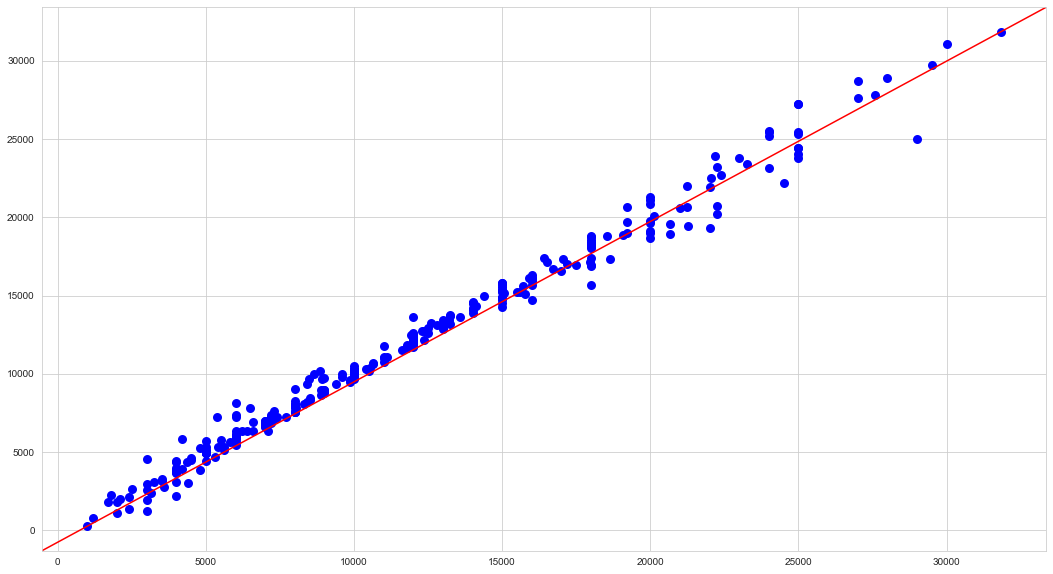

In [52]:
# Plot outputs
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(y_test, y_pred_lin_test, color='blue', linewidth=3)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='red')

plt.show()

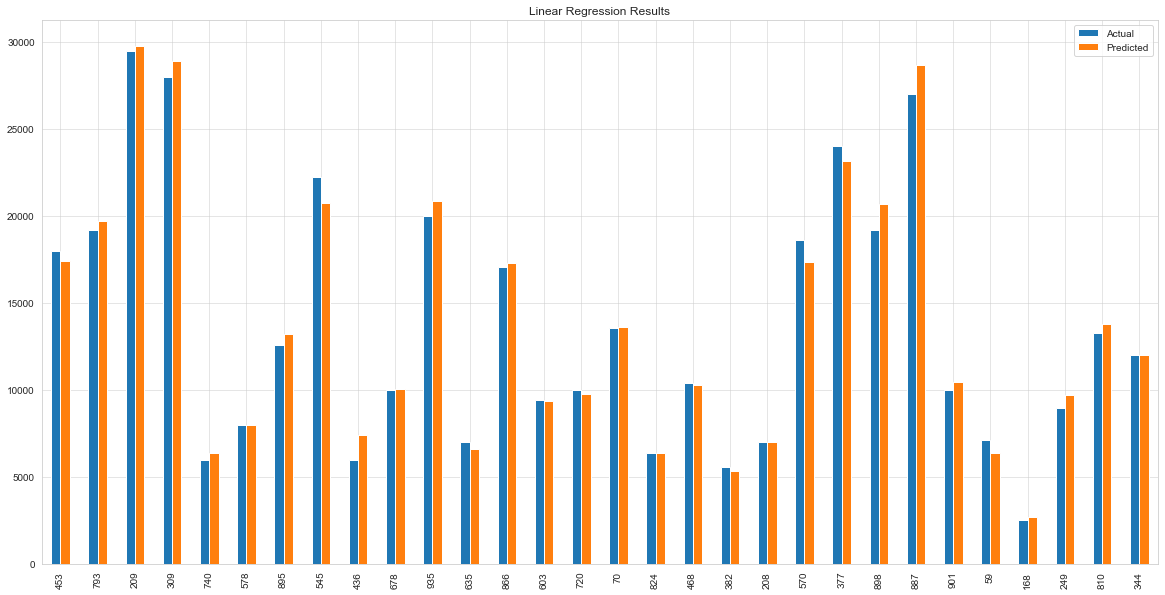

In [53]:
linear_pred = pd.DataFrame({'Actual': y_test[:30], 'Predicted': y_pred_lin_test[:30]})

linear_pred.plot(title='Linear Regression Results',kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [54]:
X_train.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,open_acc,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
728,0,14.27,205.86,4,23,0,30000.0,2,0,5,...,12,0.0,0.0,6528.97000,6528.97,4997.41,1372.03,0.000000,159.53,205.86
630,1,18.64,696.35,2,14,2,65000.0,0,4,12,...,29,0.0,0.0,40977.76997,40939.90,27050.00,13927.77,0.000000,0.00,8945.67
394,0,11.71,132.31,5,27,0,24000.0,1,5,4,...,6,0.0,0.0,4185.93000,4185.93,4000.00,185.93,0.000000,0.00,3658.15
777,0,12.42,481.18,5,26,1,48000.0,2,0,14,...,16,0.0,0.0,17352.76502,17352.77,14400.00,2928.72,24.048048,0.00,504.22
598,1,19.42,560.09,2,12,0,80000.0,0,0,16,...,44,0.0,0.0,28119.77000,28119.77,21400.00,6719.77,0.000000,0.00,16372.02


### We found out that "installment" has an unusually high correlation with CLI and decided to drop it so the model will be build in a fairer environment

In [55]:
X_test, X_train = X_test.drop('installment',axis=1), X_train.drop('installment',axis=1)

In [56]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred_lin = linreg.predict(X_test)

from sklearn.metrics import mean_absolute_error

print('MAE: '+str(mean_absolute_error(y_test, y_pred_lin)))

from sklearn.metrics import mean_squared_error

print('MSE: '+str(mean_squared_error(y_test, y_pred_lin)))

from sklearn.metrics import r2_score

print('R2: '+str(r2_score(y_test, y_pred_lin)))


MAE: 1761.1788742353071
MSE: 9036852.242623724
R2: 0.7870301968041057


Now the result seems to be more reasonable

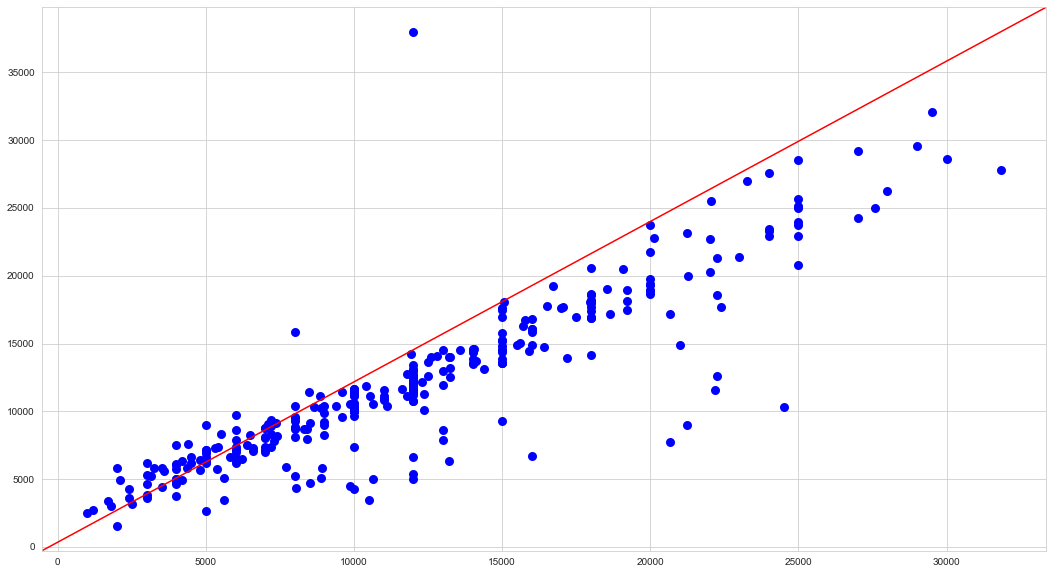

In [58]:
# Plot outputs
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(y_test, y_pred_lin, color='blue', linewidth=3)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='red')

plt.show()

After dropping "installment"

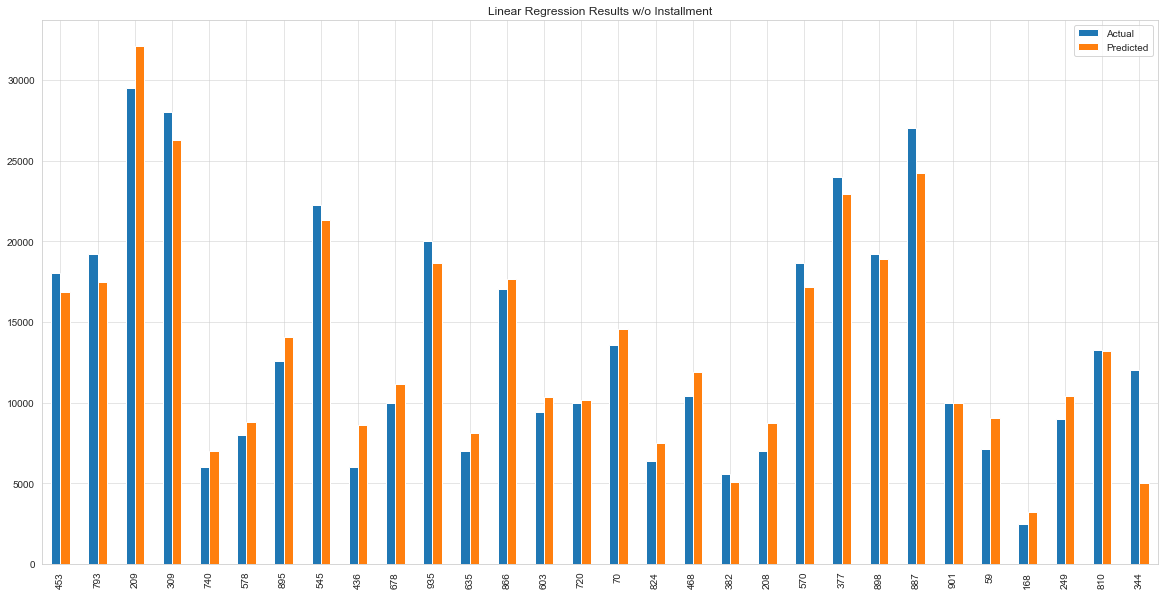

In [59]:
linear_pred = pd.DataFrame({'Actual': y_test[:30], 'Predicted': y_pred_lin[:30]})

linear_pred.plot(title='Linear Regression Results w/o Installment',kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

## Using Random Forest Algorithem

In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_rm=model.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error

print('MAE: '+str(mean_absolute_error(y_test, y_pred_rm)))

from sklearn.metrics import mean_squared_error

print('MSE: '+str(mean_squared_error(y_test, y_pred_rm)))

from sklearn.metrics import r2_score

print('R2: '+str(r2_score(y_test, y_pred_rm)))

MAE: 894.4108333333334
MSE: 3082350.6410416667
R2: 0.9273588201091587


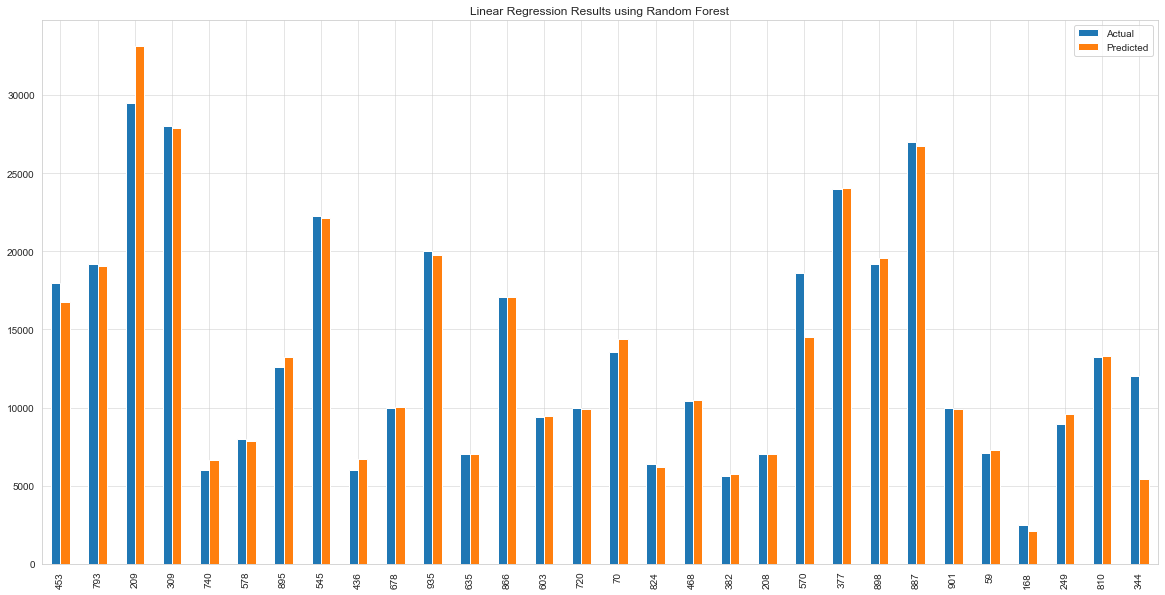

In [62]:
rm = pd.DataFrame({'Actual': y_test[:30], 'Predicted': y_pred_rm[:30]})

rm.plot(title='Linear Regression Results using Random Forest', kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

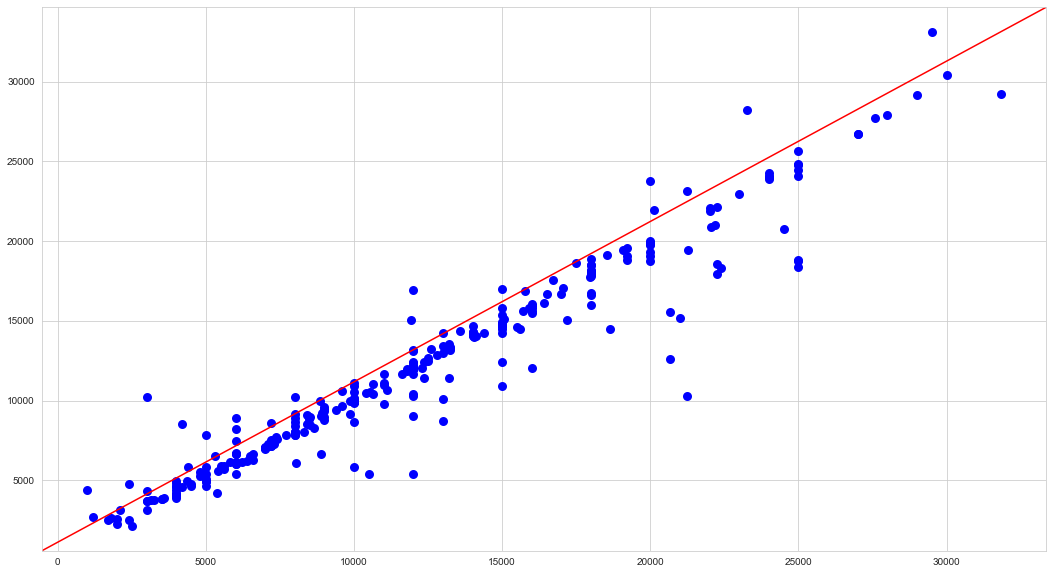

In [63]:
# Plot outputs

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(y_test, y_pred_rm, color='blue', linewidth=3)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='red')

plt.show()